<a href="https://colab.research.google.com/github/bru-or/mydailystudies/blob/main/Curso_04_DS_testando_rela%C3%A7%C3%B5es_com_Regress%C3%A3o_Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preço de imoveis

**Objetivo**: estimar os preços de imóveis
 * Identificar aspectos que contribuem para precificação dos imoveis
 * Entender qual aspecto é mais relevante, qual influencia mais no preço do imóvel.
 * Precificar um imóvel novo.

Base de dados simplificada e inspirada em [House Prices](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques)



![](https://i.imgur.com/A8X79yq.jpeg)


# 1. Ajustando uma reta

## Conhecendo os dados

In [ ]:
#Lendo dados
import pandas as pd

dados = pd.read_csv('/content/Preços_de_casas.csv')

In [ ]:
#Quais fatores coletados?
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1438 entries, 0 to 1437
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Id                              1438 non-null   int64  
 1   area_primeiro_andar             1438 non-null   float64
 2   existe_segundo_andar            1438 non-null   int64  
 3   area_segundo_andar              1438 non-null   float64
 4   quantidade_banheiros            1438 non-null   int64  
 5   capacidade_carros_garagem       1438 non-null   int64  
 6   qualidade_da_cozinha_Excelente  1438 non-null   int64  
 7   preco_de_venda                  1438 non-null   float64
dtypes: float64(3), int64(5)
memory usage: 90.0 KB


In [ ]:
dados = dados.drop(columns = 'Id')
dados.head()

,area_primeiro_andar,existe_segundo_andar,area_segundo_andar,quantidade_banheiros,capacidade_carros_garagem,qualidade_da_cozinha_Excelente,preco_de_venda
0,79.5224,1,79.3366,2,548,0,1027905.0
1,117.2398,0,0.0000,2,460,0,894795.0
2,85.4680,1,80.4514,2,608,0,1101855.0
3,89.2769,1,70.2324,1,642,0,690200.0
4,106.3705,1,97.8237,2,836,0,1232500.0


## Correlação

Quais fatores estão relacionados ao preço da casa? Como é essa relação?

Com o coeficiente de Correlação de Pearson nos permite medir a relação linear entre variáveis, oferecendo uma escala que varia de -1 a 1, que interpretamos conforme sua intensidade e direção:

* -1: indica uma correlação negativa perfeita: à medida que uma variável aumenta, a outra diminui.
* 0: não há relação linear entre as variáveis.
* 1: correlação positiva perfeita: à medida que uma variável aumenta, a outra também aumenta.



In [ ]:
# Correlação
corr = dados.corr()

In [ ]:
corr['preco_de_venda']

,preco_de_venda
area_primeiro_andar,0.616557
existe_segundo_andar,0.138541
area_segundo_andar,0.305311
quantidade_banheiros,0.563132
capacidade_carros_garagem,0.640214
qualidade_da_cozinha_Excelente,0.496223
preco_de_venda,1.000000


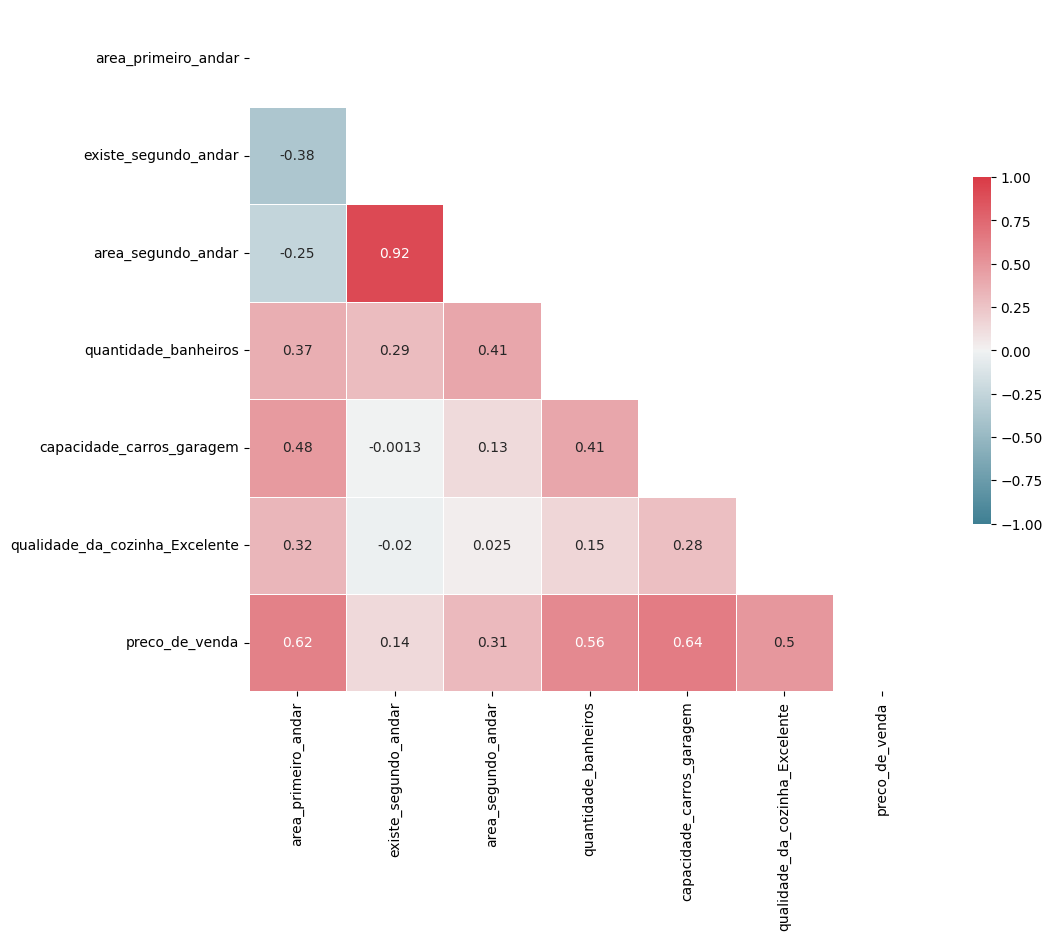

In [ ]:
# Atividade - Quais fatores estão mais correlacionados?
import numpy as np
import matplotlib.pyplot as plt  #gráficos simples
import seaborn as sns #práticas de visualização otimizadas
import plotly.express as px #gráficos interativos

# Correlação
corr2 = dados.corr()

# Gerar uma máscara para o triângulo superior
mascara = np.zeros_like(corr2, dtype=bool)
mascara[np.triu_indices_from(mascara)] = True

# Configurar a figura do matplotlib
f, ax = plt.subplots(figsize=(11, 9))

# Gerar o mapa de calor (heatmap)
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mascara, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})

# Exibir o mapa de calor (heatmap)
plt.show()

## Relacionando variáveis

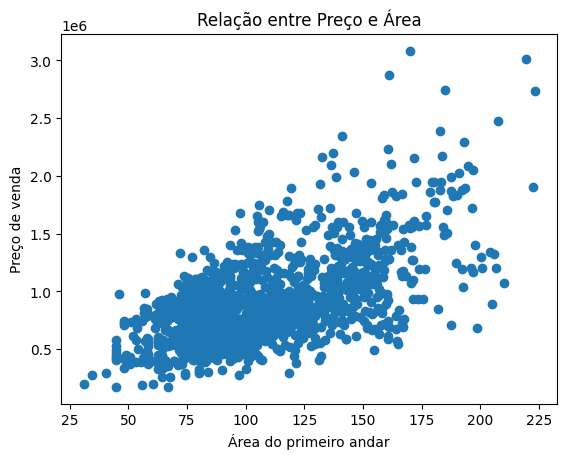

In [ ]:
# Como é a relação entre área construida e o preço do imóvel?
plt.scatter(dados['area_primeiro_andar'], dados['preco_de_venda'])
plt.title('Relação entre Preço e Área')
plt.xlabel('Área do primeiro andar')
plt.ylabel('Preço de venda')
plt.show()

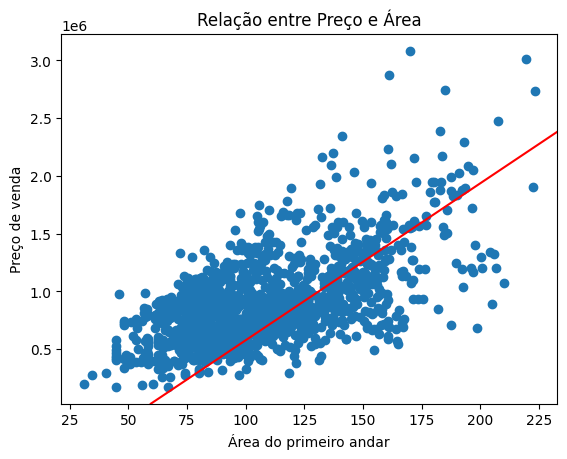

In [ ]:
# Aparentemente quanto maior a área do primeiro andar, maior o preço da casa.
# E se quisermos traçar uma linha que melhor representa esse comportamento?
plt.scatter(dados['area_primeiro_andar'], dados['preco_de_venda'])
plt.axline(xy1 = (76,250000), xy2 = (190,1800000), color='red')
plt.title('Relação entre Preço e Área')
plt.xlabel('Área do primeiro andar')
plt.ylabel('Preço de venda')
plt.show()





## Melhor reta

In [ ]:
# Qual a reta que melhor se adequa a relação?
px.scatter(dados, x='area_primeiro_andar', y='preco_de_venda', trendline_color_override='red', trendline='ols')
#ols traz uma linha mais ajustada

# 2. Explicando a reta
Ajustamos uma reta entre o $m^2$ do primeiro andar e o preço da casa. Queremos explicar o preço da casa a partir do seu tamanho, por isso dizemos que:

* Variável explicativa/independente: Área do primeiro andar

* Variável resposta/dependente: Preço da casa

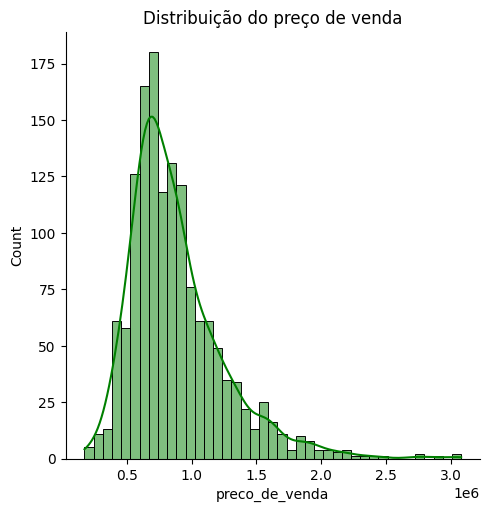

In [ ]:
#Quem é nossa variável resposta?
sns.displot(dados['preco_de_venda'], kde=True, color='green')
plt.title('Distribuição do preço de venda')
plt.show()

### Separando em treino e teste

O conjunto de **treinamento** é usado para ajustar o modelo, enquanto o conjunto de **teste** é usado para avaliar seu desempenho em prever preços de casas não vistos durante o treinamento, que auxilia na generalização do modelo.

In [ ]:
# import train_test_split
from sklearn.model_selection import train_test_split

In [ ]:
# Definindo y e X
y = dados['preco_de_venda']
x = dados.drop(columns = 'preco_de_venda')

In [ ]:
#Aplicando o split do y e X
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 230) #30% é teste, 70% pra treino / 230 é a semente de separação

In [ ]:
#Dados de treino para usar a fórmula
df_train = pd.DataFrame(data= x_train)
df_train['preco_de_venda'] = y_train

In [ ]:
# import ols
from statsmodels.formula.api import ols

In [ ]:
# ajustando o primeiro modelo
modelo_0 = ols('preco_de_venda ~ area_primeiro_andar', data=df_train).fit()

## Analisando os coeficientes

(intensidade, direção e significância)




In [ ]:
# visualizando os parametros
modelo_0.params


,0
Intercept,152909.288334
area_primeiro_andar,6793.641641


In [ ]:
# o resumo do nosso modelo
#Em média, quando aumentamos 1m2, espera-se um aumento de 6793,64 reais.
#Se a área do 1andar for zero? recorremos à interpretação do intercept. Espera-se que a casa custe 152909.28 reais.
print(modelo_0.summary())

                            OLS Regression Results                            
Dep. Variable:         preco_de_venda   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     608.3
Date:                Thu, 19 Dec 2024   Prob (F-statistic):          2.22e-105
Time:                        17:00:27   Log-Likelihood:                -14082.
No. Observations:                1006   AIC:                         2.817e+04
Df Residuals:                    1004   BIC:                         2.818e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1.529e+05   3

* O **intercepto** é o valor esperado do preço da casa quando todas as outras variáveis são zero. Neste caso, quando todas as outras variáveis a área do primeiro andar é zero, o preço esperado da casa é de R$ 152.909,28. Nem sempre temos uma interpretação prática desse número.

* O **efeito individual** da área é 6.793,64. Isso indica que para cada 1m² adicinado à área do primero andar espera-se que o preço da casa aumente em média R$6.793,64.

<img src="https://i.imgur.com/7Cm4Cot.png" width="500"/>


## Explicabilidade do modelo

Quanto a variação da área está explicando os diversos preços das casas?

Nesse caso recorremos a métrica R², o coeficiente de determinação. O R² varia de 0 a 1, onde 1 indica um ajuste perfeito do modelo aos dados, ou seja, todas as variações na variável dependente são explicadas pelas variáveis independentes no modelo. Por outro lado, um R² de 0 indica que o modelo não explica nenhuma variabilidade na variável dependente

In [ ]:
# observando o R² - 37% dos dados são explicados pelo primeiro andar
modelo_0.rsquared

0.37728010994297867

## Entendendo o resíduo

In [ ]:
# Quem são os residuos
modelo_0.resid

,0
1303,-193023.838744
326,-144522.356193
386,399612.747641
615,-68449.596607
236,166010.592859
...,...
777,465872.680999
271,-497642.319788
723,461150.204718
560,-540482.733402


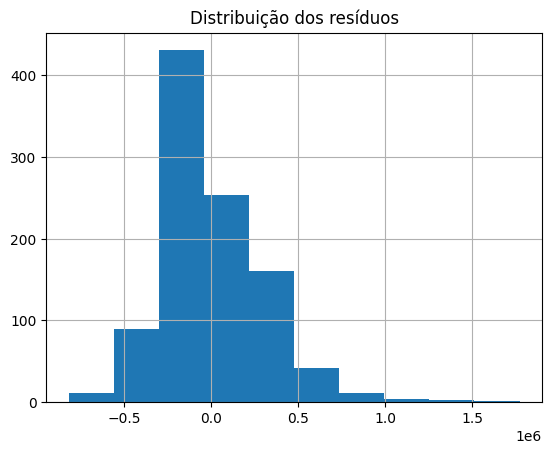

In [ ]:
# Como eles estão distribuidos
modelo_0.resid.hist()
plt.title('Distribuição dos resíduos')
plt.show()

![](https://i.imgur.com/CJMdXpf.png)

## Obtendo o R² da previsão

In [ ]:
# definindo o Y previsto
y_predict = modelo_0.predict(x_test)

In [ ]:
# importando o r2_score
from sklearn.metrics import r2_score

In [ ]:
# printando o r²
print('R²: ', r2_score(y_test, y_predict))
#R² deveria ser parecido com o do treino. Estão performando de maneira parecida.

R²:  0.38530928723202407


# 3. Adicionando outras características

O modelo com apenas um fator nos mostrou um R² de 0.37, ou seja, aproximadamente 37% da variação observada nos preços das casas pode ser explicada pela variação na área.
Isso indica que ainda há uma quantidade significativa de variação que não está sendo capturada por esse modelo específico.Vamos analisar outros fatores para explicar o preço das casas.

## Analisando os fatores

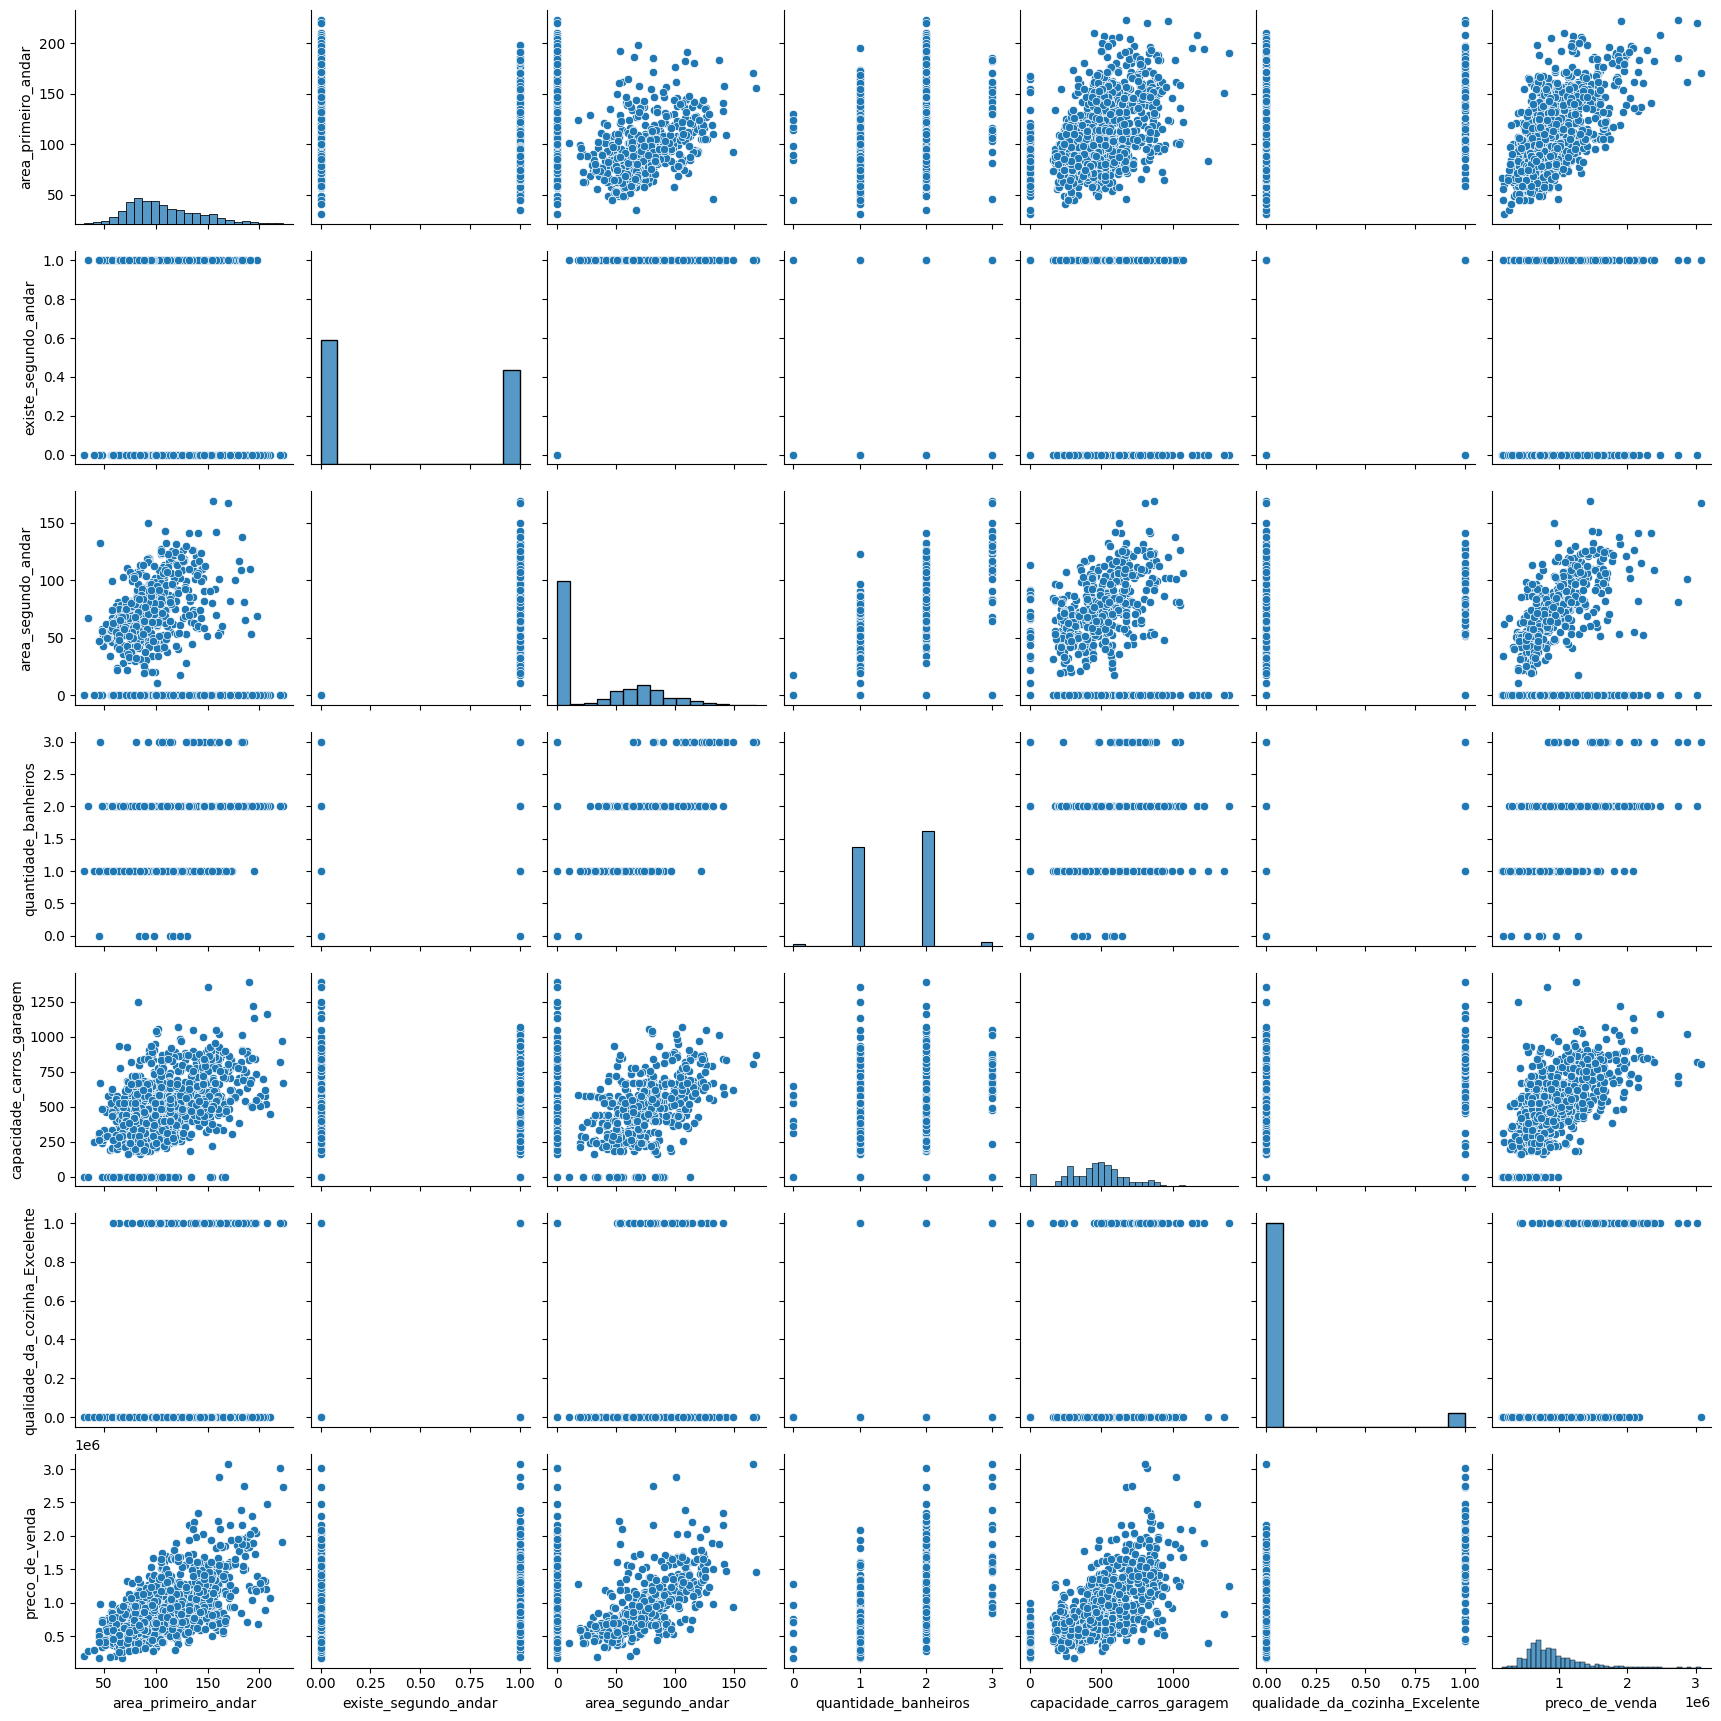

In [ ]:
# quais outras características poderiam explicar o preço dos imóveis?
sns.pairplot(dados)

In [ ]:
dados.columns

Index(['area_primeiro_andar', 'existe_segundo_andar', 'area_segundo_andar',
       'quantidade_banheiros', 'capacidade_carros_garagem',
       'qualidade_da_cozinha_Excelente', 'preco_de_venda'],
      dtype='object')

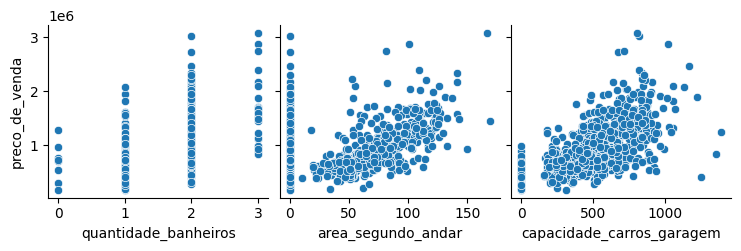

In [ ]:
#Vamos olhar apenas com y_vars='preco_de_venda' / pairplot serve para visualizar as relações das variáveis, para ajudar na decisão se inclui ou não no modelo.
sns.pairplot(dados, y_vars= 'preco_de_venda', x_vars=['quantidade_banheiros','area_segundo_andar', 'capacidade_carros_garagem'])

## Adicionando fatores no modelo

In [ ]:
# importando a api do statsmodels
import statsmodels.api as sm

In [ ]:
# adicionando o constante
X_train = x_train.copy()
X_train = sm.add_constant(X_train)
X_train.head()

,const,area_primeiro_andar,existe_segundo_andar,area_segundo_andar,quantidade_banheiros,capacidade_carros_garagem,qualidade_da_cozinha_Excelente
1303,1.0,65.7732,0,0.0000,1,0,0
326,1.0,55.3684,1,55.3684,1,189,0
386,1.0,74.6916,1,107.4853,2,560,0
615,1.0,103.6764,0,0.0000,1,440,0
236,1.0,94.2006,1,67.8170,2,457,0


In [ ]:
X_train.columns

Index(['const', 'area_primeiro_andar', 'existe_segundo_andar',
       'area_segundo_andar', 'quantidade_banheiros',
       'capacidade_carros_garagem', 'qualidade_da_cozinha_Excelente'],
      dtype='object')

In [ ]:
# Criando o modelo de regressão (sem fómula): saturado
modelo_1 = sm.OLS(y_train,
                  X_train[['const', 'area_primeiro_andar', 'existe_segundo_andar',
                  'area_segundo_andar', 'quantidade_banheiros', 'capacidade_carros_garagem',
                          'qualidade_da_cozinha_Excelente']]).fit()

In [ ]:
# Modelo sem a área do segundo andar
modelo_2 = sm.OLS(y_train,
                  X_train[['const', 'area_primeiro_andar', 'existe_segundo_andar',
                  'quantidade_banheiros', 'capacidade_carros_garagem',
                          'qualidade_da_cozinha_Excelente']]).fit()

In [ ]:
# Modelo sem informações sobre garagem
modelo_3 = sm.OLS(y_train,
                  X_train[['const', 'area_primeiro_andar', 'existe_segundo_andar',
                 'quantidade_banheiros','qualidade_da_cozinha_Excelente']]).fit()

In [ ]:
# Resumo do modelo 1
print(modelo_1.summary())

                            OLS Regression Results                            
Dep. Variable:         preco_de_venda   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     477.4
Date:                Thu, 19 Dec 2024   Prob (F-statistic):          2.79e-289
Time:                        17:00:55   Log-Likelihood:                -13640.
No. Observations:                1006   AIC:                         2.729e+04
Df Residuals:                     999   BIC:                         2.733e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [ ]:
# Resumo do modelo 2
print(modelo_2.summary())

                            OLS Regression Results                            
Dep. Variable:         preco_de_venda   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     485.3
Date:                Thu, 19 Dec 2024   Prob (F-statistic):          1.93e-264
Time:                        17:00:55   Log-Likelihood:                -13701.
No. Observations:                1006   AIC:                         2.741e+04
Df Residuals:                    1000   BIC:                         2.744e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [ ]:
# Resumo do modelo 3
print(modelo_3.summary())

                            OLS Regression Results                            
Dep. Variable:         preco_de_venda   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     467.1
Date:                Thu, 19 Dec 2024   Prob (F-statistic):          4.15e-227
Time:                        17:00:55   Log-Likelihood:                -13790.
No. Observations:                1006   AIC:                         2.759e+04
Df Residuals:                    1001   BIC:                         2.762e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

## Comparando modelos
Qual o melhor modelo?


In [ ]:
print("R²")
print("Modelo 0: ", modelo_0.rsquared)
print("Modelo 1: ", modelo_1.rsquared)
print("Modelo 2: ", modelo_2.rsquared)
print("Modelo 3: ", modelo_3.rsquared)

R²
Modelo 0:  0.37728010994297867
Modelo 1:  0.7414024156090393
Modelo 2:  0.7081440416220739
Modelo 3:  0.6511289354898803


In [ ]:
#Quantos parametros estão no modelo?
print(len(modelo_0.params))
print(len(modelo_1.params))
print(len(modelo_2.params))
print(len(modelo_3.params))

2
7
6
5


In [ ]:
#Escolhemos o modelo 3, porque ele não tem indicação de multicollinearity e variação do coeficiente do existe_segundo_andar

In [ ]:
modelo_3.params

,0
const,-129979.678094
area_primeiro_andar,6119.653184
existe_segundo_andar,221306.959705
quantidade_banheiros,149036.289458
qualidade_da_cozinha_Excelente,444391.228573


#Atividade Aula - Precificação de quartos de hotéis

In [ ]:
dados_hotel = pd.read_csv('/content/hoteis.csv')
dados_hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Estrelas            1000 non-null   int64  
 1   ProximidadeTurismo  1000 non-null   float64
 2   Capacidade          1000 non-null   int64  
 3   Preco               1000 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 31.4 KB


#1. Análise inicial com o PairPlot da Seaborn;

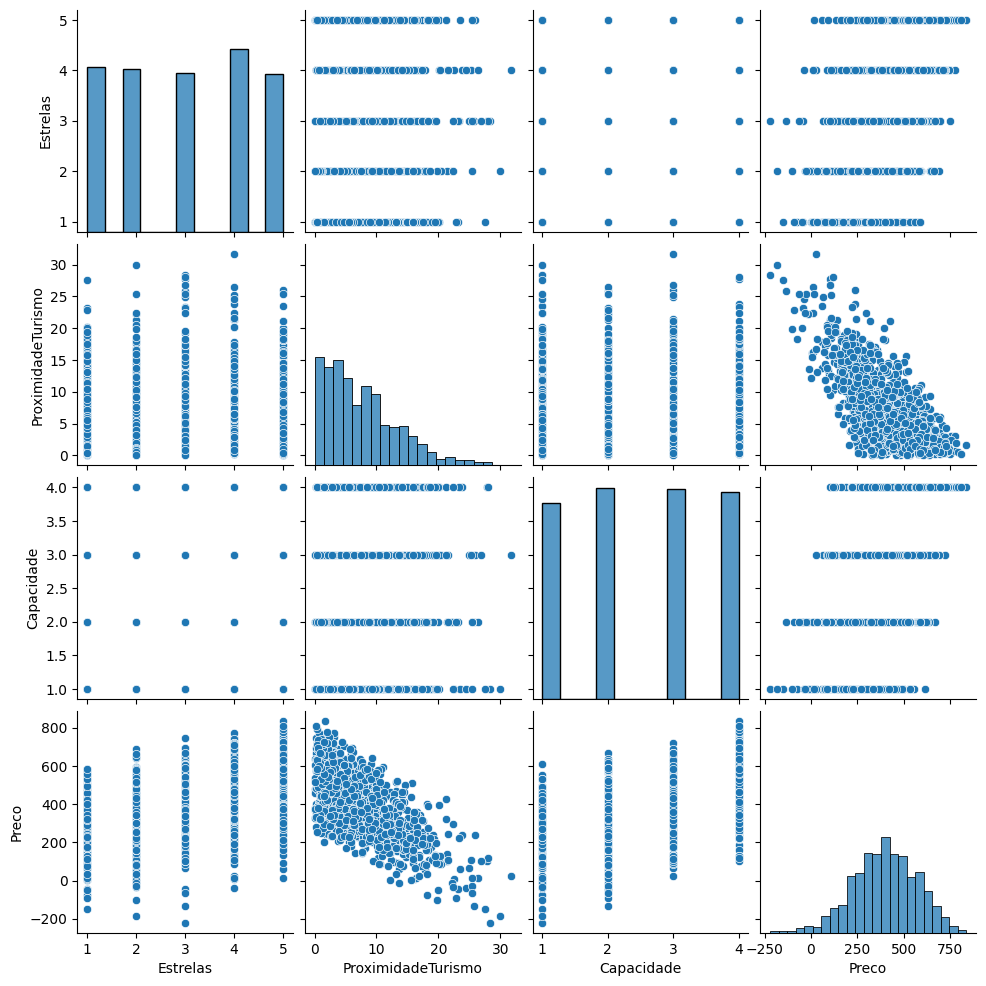

In [ ]:
sns.pairplot(dados_hotel)

In [ ]:
dados_hotel.columns

Index(['Estrelas', 'ProximidadeTurismo', 'Capacidade', 'Preco'], dtype='object')

#2. Construir modelos de regressão linear

In [ ]:
#MODELO 0 >> Preço x Estrelas
y = dados_hotel['Preco']
x = dados_hotel.drop(columns = 'Preco')

xx_train, xx_test, yy_train, yy_test = train_test_split(x, y, test_size=0.3, random_state = 250)

df_train = pd.DataFrame(data= xx_train)
df_train['Preco'] = yy_train

modelo_hotel_0 = ols('Preco ~ Estrelas', data=df_train).fit()

xx_train = sm.add_constant(xx_train)

#MODELO 1 >> Preço x Estrelas x ProximidadeTurismo
modelo_hotel_1 = sm.OLS(yy_train,
                  xx_train[['Estrelas', 'ProximidadeTurismo']]).fit()

#MODELO 2 >> Preço x Estrelas x ProximidadeTurismo x Capacidade
modelo_hotel_2 = sm.OLS(yy_train,
                  xx_train[['Estrelas', 'ProximidadeTurismo', 'Capacidade']]).fit()

Modelos gerados pela monitora:

In [ ]:
# Modelo 1: Utilizando apenas 'Estrelas'
X1 = dados_hotel[['Estrelas']]
X1 = sm.add_constant(X1)  # Adicionando a constante
y = dados_hotel['Preco']
modelo_11 = sm.OLS(y, X1).fit()

# Modelo 2: Utilizando 'Estrelas' e 'ProximidadeTurismo'
X2 = dados_hotel[['Estrelas', 'ProximidadeTurismo']]
X2 = sm.add_constant(X2)
modelo_22 = sm.OLS(y, X2).fit()

# Modelo 3: Utilizando 'Estrelas', 'ProximidadeTurismo' e 'Capacidade'
X3 = dados_hotel[['Estrelas', 'ProximidadeTurismo', 'Capacidade']]
X3 = sm.add_constant(X3)
modelo_33 = sm.OLS(y, X3).fit()

#3. Realizar a comparação desses modelos

In [ ]:
print("R²")
print("Modelo 0: ", modelo_hotel_0.rsquared)
print("Modelo 1: ", modelo_hotel_1.rsquared)
print("Modelo 2: ", modelo_hotel_2.rsquared)

print("R²: Outro jeito")
print("Modelo 0: ", modelo_11.rsquared)
print("Modelo 1: ", modelo_22.rsquared)
print("Modelo 2: ", modelo_33.rsquared)

R²
Modelo 0:  0.17305120561321052
Modelo 1:  0.827884974455972
Modelo 2:  0.9718429274712691
R²: Outro jeito
Modelo 0:  0.16088060910369262
Modelo 1:  0.6498344879892148
Modelo 2:  0.9230202753377601


In [ ]:
print("Parâmetros: ", len(modelo_hotel_0.params))
print("Parâmetros: ", len(modelo_hotel_1.params))
print("Parâmetros: ", len(modelo_hotel_2.params))


print("Parâmetros: ", len(modelo_11.params))
print("Parâmetros: ", len(modelo_22.params))
print("Parâmetros: ", len(modelo_33.params))

Parâmetros:  2
Parâmetros:  2
Parâmetros:  3
Parâmetros:  2
Parâmetros:  3
Parâmetros:  4


In [ ]:
#Resumo modelo 0
print(modelo_hotel_0.summary())

                            OLS Regression Results                            
Dep. Variable:                  Preco   R-squared:                       0.173
Model:                            OLS   Adj. R-squared:                  0.172
Method:                 Least Squares   F-statistic:                     146.1
Date:                Thu, 19 Dec 2024   Prob (F-statistic):           1.14e-30
Time:                        17:01:05   Log-Likelihood:                -4523.4
No. Observations:                 700   AIC:                             9051.
Df Residuals:                     698   BIC:                             9060.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    245.5864     13.834     17.752      0.0

In [ ]:
#Resumo modelo 1
print(modelo_hotel_1.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Preco   R-squared (uncentered):                   0.828
Model:                            OLS   Adj. R-squared (uncentered):              0.827
Method:                 Least Squares   F-statistic:                              1679.
Date:                Thu, 19 Dec 2024   Prob (F-statistic):                   2.00e-267
Time:                        17:01:05   Log-Likelihood:                         -4625.4
No. Observations:                 700   AIC:                                      9255.
Df Residuals:                     698   BIC:                                      9264.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

In [ ]:
#Resumo modelo 2
print(modelo_hotel_2.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Preco   R-squared (uncentered):                   0.972
Model:                            OLS   Adj. R-squared (uncentered):              0.972
Method:                 Least Squares   F-statistic:                              8019.
Date:                Thu, 19 Dec 2024   Prob (F-statistic):                        0.00
Time:                        17:01:05   Log-Likelihood:                         -3991.7
No. Observations:                 700   AIC:                                      7989.
Df Residuals:                     697   BIC:                                      8003.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

# 4. Precificando as casas

## Obtendo o R² da previsão

In [ ]:
x_test.columns

Index(['area_primeiro_andar', 'existe_segundo_andar', 'area_segundo_andar',
       'quantidade_banheiros', 'capacidade_carros_garagem',
       'qualidade_da_cozinha_Excelente'],
      dtype='object')

In [ ]:
modelo_3.params

,0
const,-129979.678094
area_primeiro_andar,6119.653184
existe_segundo_andar,221306.959705
quantidade_banheiros,149036.289458
qualidade_da_cozinha_Excelente,444391.228573


In [ ]:
# Adicionando uma constante em X_test
x_test = sm.add_constant(x_test)

In [ ]:
# Prevendo com o modelo 3
predict_3 = modelo_3.predict(x_test[['const','area_primeiro_andar', 'existe_segundo_andar',
                        'quantidade_banheiros', 'qualidade_da_cozinha_Excelente']])

In [ ]:
# Qual o r² da previsão?
modelo_3.rsquared

0.6511289354898803

In [ ]:
# Qual o R² do treino?
print("R²: ", r2_score(y_test, predict_3))

R²:  0.6432078074497706


## Precificando uma casa


<img src="https://i.imgur.com/e4gytI1.png" width="800"/>

In [ ]:
modelo_3.params

,0
const,-129979.678094
area_primeiro_andar,6119.653184
existe_segundo_andar,221306.959705
quantidade_banheiros,149036.289458
qualidade_da_cozinha_Excelente,444391.228573


In [ ]:
#Novo imovel
novo_imovel = pd.DataFrame({'const': [1],
                            'area_primeiro_andar':[120],
                            'existe_segundo_andar':[1],
                            'quantidade_banheiros':[2],
                            'qualidade_da_cozinha_Excelente':[0]})
novo_imovel

,const,area_primeiro_andar,existe_segundo_andar,quantidade_banheiros,qualidade_da_cozinha_Excelente
0,1,120,1,2,0


In [ ]:
# Qual o preço desse imóvel com o modelo 0?
print(modelo_0.predict(novo_imovel['area_primeiro_andar'])[0])

968146.2853053517


In [ ]:
# Qual o preço desse imóvel com o modelo 3?
print(modelo_3.predict(novo_imovel)[0])

1123758.2426020515


## Precificando várias casas

<img src="https://i.imgur.com/i0skFlB.jpeg" width="600"/>

In [ ]:
# Lendo várias casas?
novas_casas = pd.read_csv('/content/Novas_casas.csv', sep=';')

In [ ]:
novas_casas.head()

,Casa,area_primeiro_andar,existe_segundo_andar,quantidade_banheiros,qualidade_da_cozinha_Excelente
0,1,150,1,2,1
1,2,180,0,3,1
2,3,120,1,2,1
3,4,200,1,3,1
4,5,160,0,2,1


In [ ]:
novas_casas = novas_casas.drop(columns='Casa')

In [ ]:
# Adicionando uma constante
novas_casas = sm.add_constant(novas_casas)
novas_casas.head()

,const,area_primeiro_andar,existe_segundo_andar,quantidade_banheiros,qualidade_da_cozinha_Excelente
0,1.0,150,1,2,1
1,1.0,180,0,3,1
2,1.0,120,1,2,1
3,1.0,200,1,3,1
4,1.0,160,0,2,1


In [ ]:
# Qual o preço dessas novas casas?
modelo_3.predict(novas_casas)

,0
0,1.751739e+06
1,1.863058e+06
2,1.568149e+06
3,2.206758e+06
4,1.591629e+06
5,1.246151e+06
6,1.357470e+06
7,1.552134e+06
8,9.636478e+05
9,1.639974e+06


In [ ]:
#Atividade da aula - utilizar o modelo de regressão treinado durante o curso para obter o preço da casa com essas características
nova_casa_ex = pd.DataFrame({ 'const': [1],
                            'area_primeiro_andar':[98],
                            'existe_segundo_andar':[0],
                            'quantidade_banheiros':[1],
                            'qualidade_da_cozinha_Excelente':[1]})

modelo_3.predict(nova_casa_ex)[0] #colocar o [0] ajuda a não truncar o valor

1063173.8519646404

In [ ]:
#Salvando um modelo com Pickle
import pickle

# Nome do arquivo onde o modelo será salvo
nome_arquivo = 'modelo_3.pkl'

# Salvar o modelo em um arquivo usando pickle
with open(nome_arquivo, 'wb') as arquivo:
    pickle.dump(modelo_3, arquivo)

In [ ]:
#Carregando um modelo de volta com Pickle
with open(nome_arquivo, 'rb') as arquivo:
    modelo_carregado = pickle.load(arquivo)

# 5. Investigando o modelo





## Multicolinearidade


Quando duas ou mais coisas que você está tentando estudar são tão parecidas que é difícil dizer o quanto cada uma delas está influenciando o resultado.

In [ ]:
# import do VIF do statsmodel
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
explicativas_1 = ['const','area_primeiro_andar', 'existe_segundo_andar',
       'area_segundo_andar', 'quantidade_banheiros',
       'capacidade_carros_garagem', 'qualidade_da_cozinha_Excelente']

explicativas_2 = ['const','area_primeiro_andar', 'existe_segundo_andar',
       'quantidade_banheiros', 'capacidade_carros_garagem',
       'qualidade_da_cozinha_Excelente']

explicativas_3 = ['const','area_primeiro_andar', 'existe_segundo_andar',
       'quantidade_banheiros', 'qualidade_da_cozinha_Excelente']

In [ ]:
# VIF 1
vif_1 = pd.DataFrame()
vif_1['variavel'] = explicativas_1
vif_1["vif"] = [variance_inflation_factor(X_train[explicativas_1], i) for i in range(len(explicativas_1))]

In [ ]:
vif_1 #VIF é melhor que seja menor e até a 5

,variavel,vif
0,const,20.230833
1,area_primeiro_andar,2.193680
2,existe_segundo_andar,7.455059
3,area_segundo_andar,7.589396
4,quantidade_banheiros,1.720795
5,capacidade_carros_garagem,1.570078
6,qualidade_da_cozinha_Excelente,1.182606


In [ ]:
# VIF 3
vif_3 = pd.DataFrame()
vif_3['variavel'] = explicativas_3
vif_3["vif"] = [variance_inflation_factor(X_train[explicativas_3], i) for i in range(len(explicativas_3))]
vif_3

,variavel,vif
0,const,18.773457
1,area_primeiro_andar,1.919046
2,existe_segundo_andar,1.644067
3,quantidade_banheiros,1.539255
4,qualidade_da_cozinha_Excelente,1.151795


## Análise dos resíduos

Resíduos: a discrepância entre os valores reais e os valores que o modelo prevê para os mesmos pontos de dados.

In [ ]:
# Prevendo os valores do treino X_train[explicativas_3]
y_previsto_train = modelo_3.predict(X_train[explicativas_3])

In [ ]:
# Fazendo um scatter plot (gráfico de dispersão) entre y_previsto e y_train
fig = px.scatter(x= y_previsto_train, y= y_train,
                 title='Previsão X Real',
                 labels={'x':'Preço previsto','y':'Preço real'})
fig.show()

In [ ]:
# Residuos
residuos = modelo_3.resid

<Axes: title={'center': 'Resíduos X Previsão'}, xlabel='Preço da Casa - Previsão', ylabel='Resíduos'>

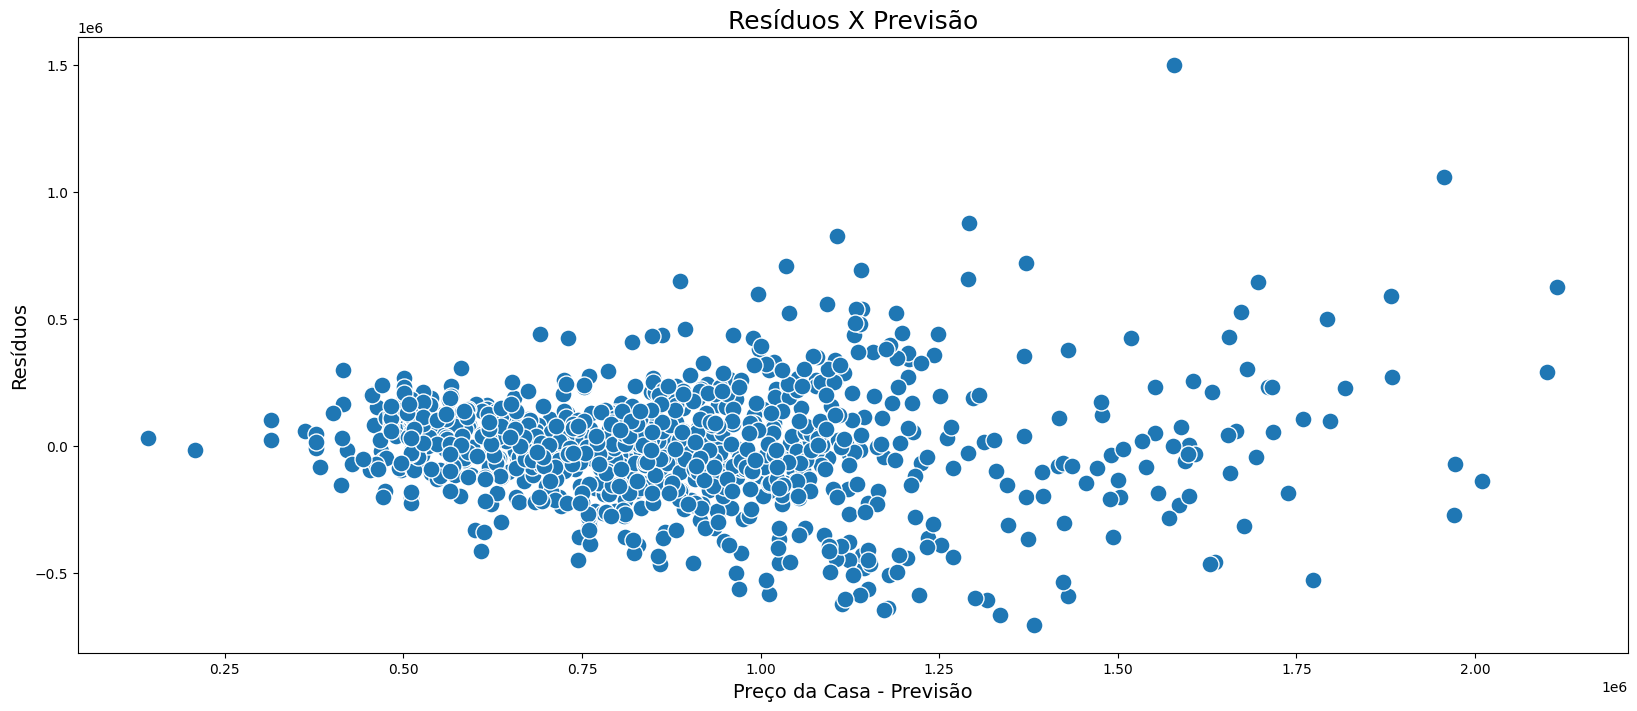

In [ ]:
ax = sns.scatterplot(x=y_previsto_train, y= residuos, s=150)
ax.figure.set_size_inches(20, 8)
ax.set_title('Resíduos X Previsão', fontsize=18)
ax.set_xlabel('Preço da Casa - Previsão', fontsize=14)
ax.set_ylabel('Resíduos', fontsize=14)
ax

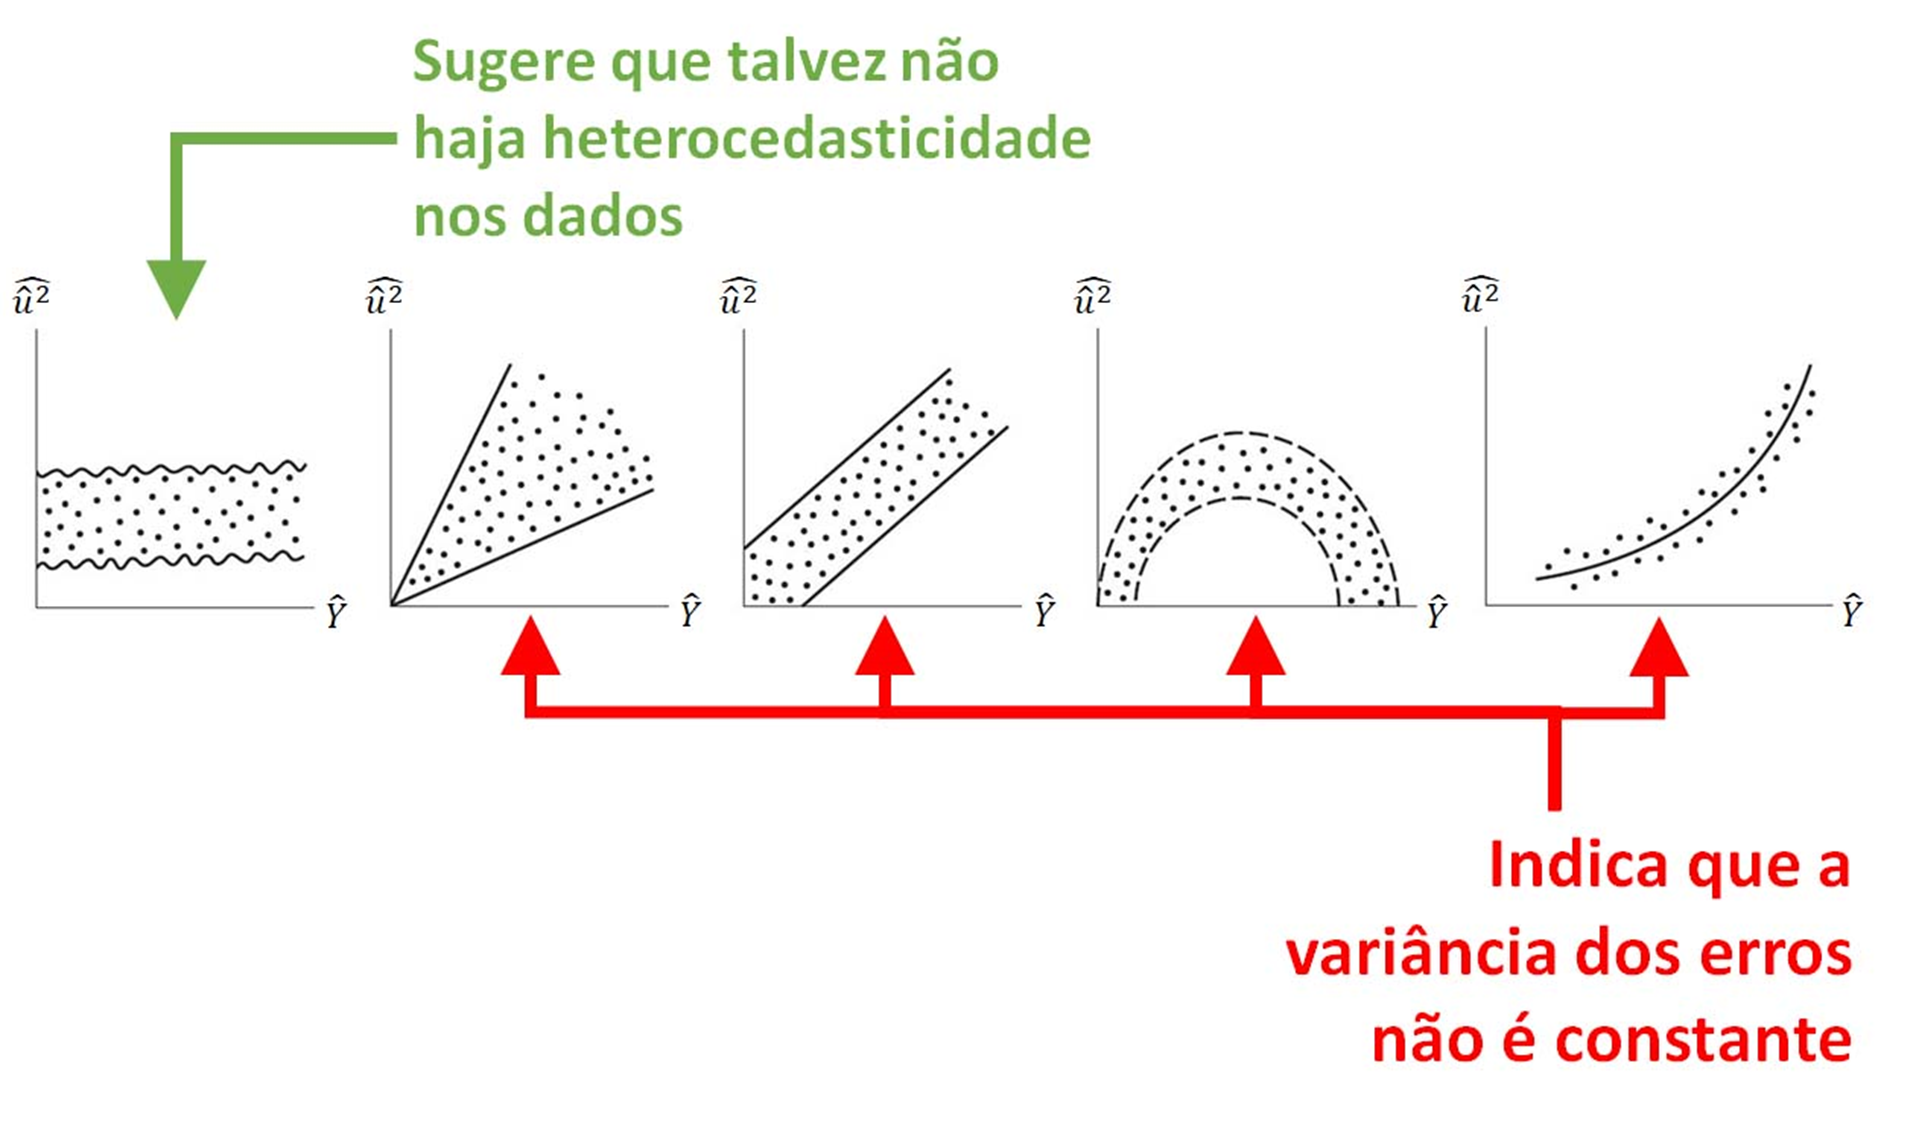

In [ ]:
#Atividade da aula - Caso da USINA
usina = pd.read_csv('/content/usina.csv')
usina

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


In [ ]:
#Primeira etapa: Verifique a multicolinearidade utilizando o conceito de VIF. Se houver indícios de multicolinearidade entre as variáveis, tente pensar em quais medidas podem ser tomadas. Para isso você deverá construir um modelo de regressão linear assumindo que a coluna PE é a variável y.
variaveis = ['const','AT','V','AP','RH']

y = usina['PE']
x = usina.drop(['PE'], axis=1)

x_usina_train, x_usina_test, y_usina_train, y_usina_test = train_test_split(x, y, test_size=0.3, random_state = 230)

x_usina_train = sm.add_constant(x_usina_train)

In [ ]:
modelo_usina = sm.OLS(y_usina_train, x_usina_train).fit()
modelo_usina.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 2.191e+04
Date:                Thu, 19 Dec 2024   Prob (F-statistic):               0.00
Time:                        18:22:36   Log-Likelihood:                -19662.
No. Observations:                6697   AIC:                         3.933e+04
Df Residuals:                    6692   BIC:                         3.937e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        446.1042     11.769     37.905      0.000     423.033     469.175
AT            -1.9607      0.018   -106.991      0.000      -1.997      -1.925
V             -0.2413      0.009    -27.670      0.000      -0.258      -0.224
AP             0.0702      0.011      6.152      0.000       0.048       0.093
RH            -0.1537      0.005    -30.823      0.000      -0.163      -0.144
==============================================================================
Omnibus:                      481.758   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1740.892
Skew:                          -0.300   Prob(JB):                         0.00
Kurtosis:                       5.424   Cond. No.                     2.15e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.15e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
vif_usina = pd.DataFrame()
vif_usina['variavel'] = variaveis
vif_usina["vif_usina"] = [variance_inflation_factor(x_usina_train[variaveis].values, i) for i in range(len(variaveis))]
vif_usina

,variavel,vif_usina
0,const,44603.788615
1,AT,6.034363
2,V,3.954998
3,AP,1.468530
4,RH,1.717508


Valores de vif abaixo de 5 geralmente indicam uma multicolinearidade baixa, o que é o caso para AP, V e RH.

VIF entre 5 e 10 (caso AT), indica uma multicolinearidade alta.

Em resumo, os resultados indicam que, exceto pela temperatura ambiente (AT), as outras variáveis têm um nível aceitável de multicolinearidade no modelo. A temperatura ambiente apresenta um nível moderado de multicolinearidade e pode necessitar de uma investigação mais detalhada ou de uma possível reformulação do modelo.

In [ ]:
#Segunda etapa: Realize uma análise de resíduos e identifique se há ou não heterocedasticidade nos dados.
y_previsto_train_usina = modelo_usina.predict(x_usina_train)

figura_usina = px.scatter(x= y_previsto_train_usina, y= y_usina_train,
                 title='Previsão X Real',
                 labels={'x':'PE previsto','y':'PE real'})
figura_usina.show()

<Axes: title={'center': 'Resíduos X Previsão'}, xlabel='PE - Previsão', ylabel='Resíduos'>

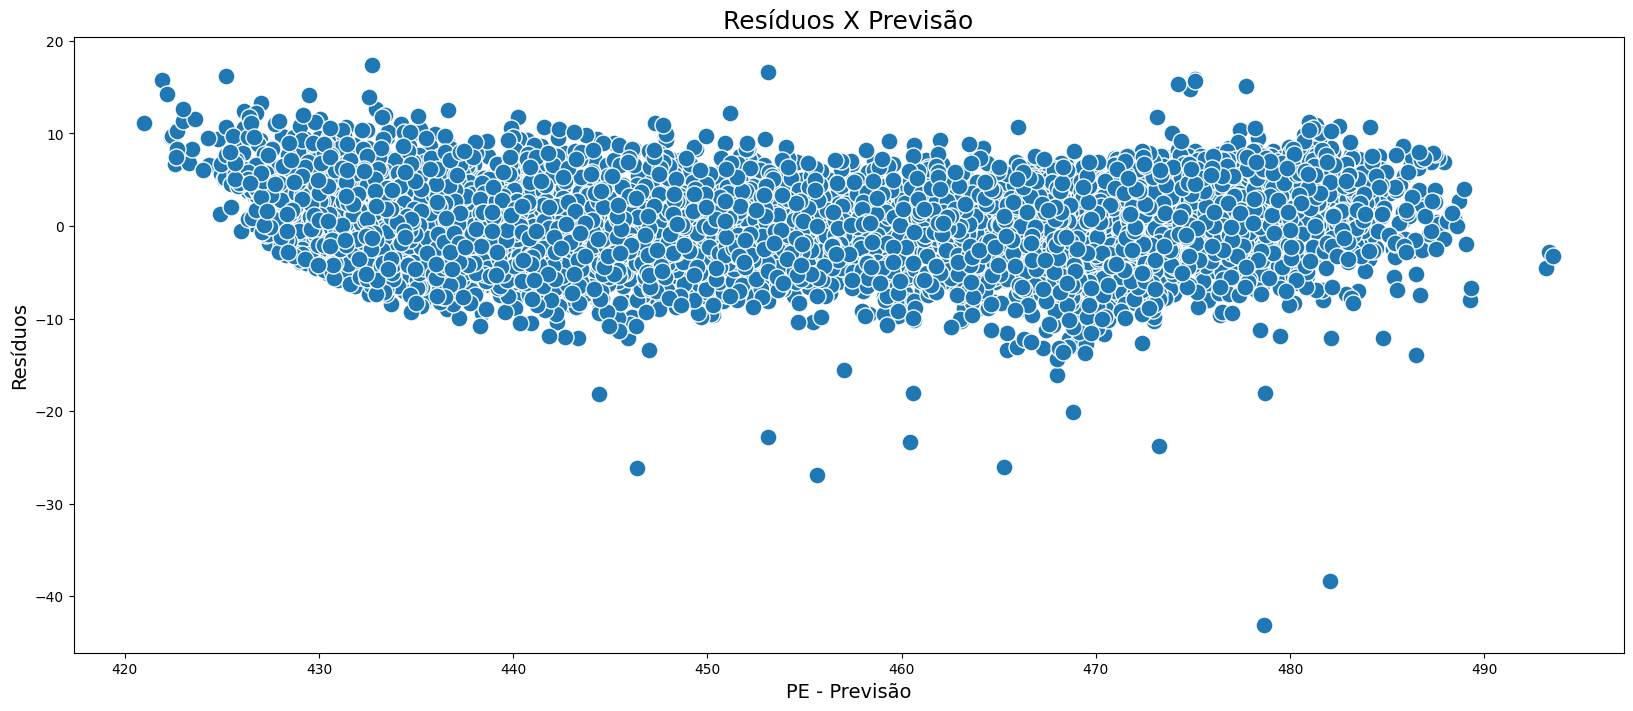

In [ ]:
residuos_usina = modelo_usina.resid

ax = sns.scatterplot(x=y_previsto_train_usina, y= residuos_usina, s=150)
ax.figure.set_size_inches(20, 8)
ax.set_title('Resíduos X Previsão', fontsize=18)
ax.set_xlabel('PE - Previsão', fontsize=14)
ax.set_ylabel('Resíduos', fontsize=14)
ax

Acredito que não há indícios de heterocedasticidade nesse caso, pois os dados estão distribuídos sem realizar padrões.